##### About Dataset

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./archive/loan_approval_dataset.csv")

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.drop("loan_id", axis=1, inplace=True)

In [6]:
df.isna().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
df.dtypes

 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [9]:
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        df[label] = enc.fit_transform(content)

In [10]:
df.dtypes

 no_of_dependents            int64
 education                   int32
 self_employed               int32
 income_annum                int64
 loan_amount                 int64
 loan_term                   int64
 cibil_score                 int64
 residential_assets_value    int64
 commercial_assets_value     int64
 luxury_assets_value         int64
 bank_asset_value            int64
 loan_status                 int32
dtype: object

In [11]:
X = df.drop(" loan_status", axis=1)
y = df[" loan_status"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10000)

In [14]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000)

In [15]:
model.score(X_test, y_test)

0.9800936768149883

In [16]:
feature_importances = pd.Series(model.feature_importances_, model.feature_names_in_)


In [17]:
import seaborn as sn

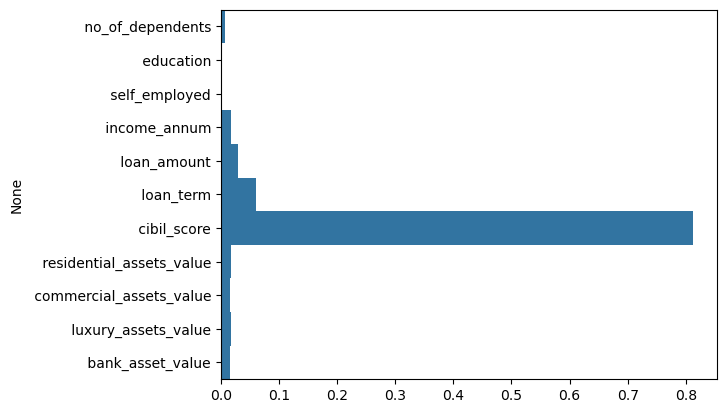

In [18]:
sn.barplot(x=feature_importances.values, y=feature_importances.index, width=1);

In [19]:
y_preds = model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix

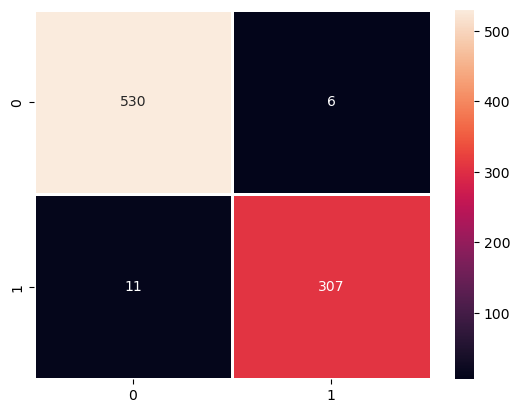

In [21]:
sn.heatmap(confusion_matrix(y_pred=y_preds, y_true=y_test), linewidths=1, annot=True, fmt="d");

In [22]:
feature_importances

 no_of_dependents            0.007997
 education                   0.002262
 self_employed               0.002727
 income_annum                0.017875
 loan_amount                 0.029337
 loan_term                   0.061394
 cibil_score                 0.812511
 residential_assets_value    0.017516
 commercial_assets_value     0.015530
 luxury_assets_value         0.017704
 bank_asset_value            0.015146
dtype: float64

In [23]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [24]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
model.score(X_test, y_test)

0.5784543325526932

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()

In [27]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
model.score(X_test, y_test)

0.9824355971896955

In [31]:
import optuna

In [39]:
def objective(trial):
    params = {
    "learning_rate": trial.suggest_float("learning_rate", 0, 1),
    "max_depth": trial.suggest_int("max_depth", 8, 12),
    "max_leaves": trial.suggest_int("max_leaves", 2, 8),
    "num_parallel_tree": trial.suggest_int("num_parallel_tree", 2, 4),
    "n_estimators": trial.suggest_int("n_estimators", 200, 1000)
}
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)


In [40]:
study = optuna.create_study(direction="maximize")

[I 2025-04-11 09:05:33,240] A new study created in memory with name: no-name-7314d441-14c1-4eef-833b-590361dcf0d4


In [42]:
study.optimize(objective, n_trials=300, n_jobs=-1, show_progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

[I 2025-04-11 09:06:32,005] Trial 102 finished with value: 0.9789227166276346 and parameters: {'learning_rate': 0.4327598807487135, 'max_depth': 12, 'max_leaves': 7, 'num_parallel_tree': 3, 'n_estimators': 516}. Best is trial 35 with value: 0.9812646370023419.
[I 2025-04-11 09:06:32,409] Trial 104 finished with value: 0.9765807962529274 and parameters: {'learning_rate': 0.9980360524109642, 'max_depth': 12, 'max_leaves': 7, 'num_parallel_tree': 3, 'n_estimators': 697}. Best is trial 35 with value: 0.9812646370023419.
[I 2025-04-11 09:06:32,571] Trial 106 finished with value: 0.977751756440281 and parameters: {'learning_rate': 0.9736570970646059, 'max_depth': 12, 'max_leaves': 7, 'num_parallel_tree': 3, 'n_estimators': 713}. Best is trial 35 with value: 0.9812646370023419.
[I 2025-04-11 09:06:33,440] Trial 107 finished with value: 0.9800936768149883 and parameters: {'learning_rate': 0.9018178120641562, 'max_depth': 12, 'max_leaves': 7, 'num_parallel_tree': 3, 'n_estimators': 844}. Best i

In [43]:
study.best_params

{'learning_rate': 0.8064489846310308,
 'max_depth': 12,
 'max_leaves': 7,
 'num_parallel_tree': 3,
 'n_estimators': 950}

In [44]:
new_params = study.best_params

In [ ]:
model = XGBClassifier(**new_params)

In [46]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8064489846310308,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=7,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=950, n_jobs=None,
              num_parallel_tree=3, random_state=None, ...)

In [ ]:
model.score(X_test, y_test)

0.9847775175644028